In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission_df = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
sns.set_style("whitegrid")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print(missing_train)


Cabin       687
Age         177
Embarked      2
dtype: int64


In [8]:
missing_train_percentage = (train_df.isnull().sum() / len(train_df)) * 100
missing_train_percentage = missing_train_percentage[missing_train_percentage > 0].sort_values(ascending=False)
print(missing_train_percentage)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


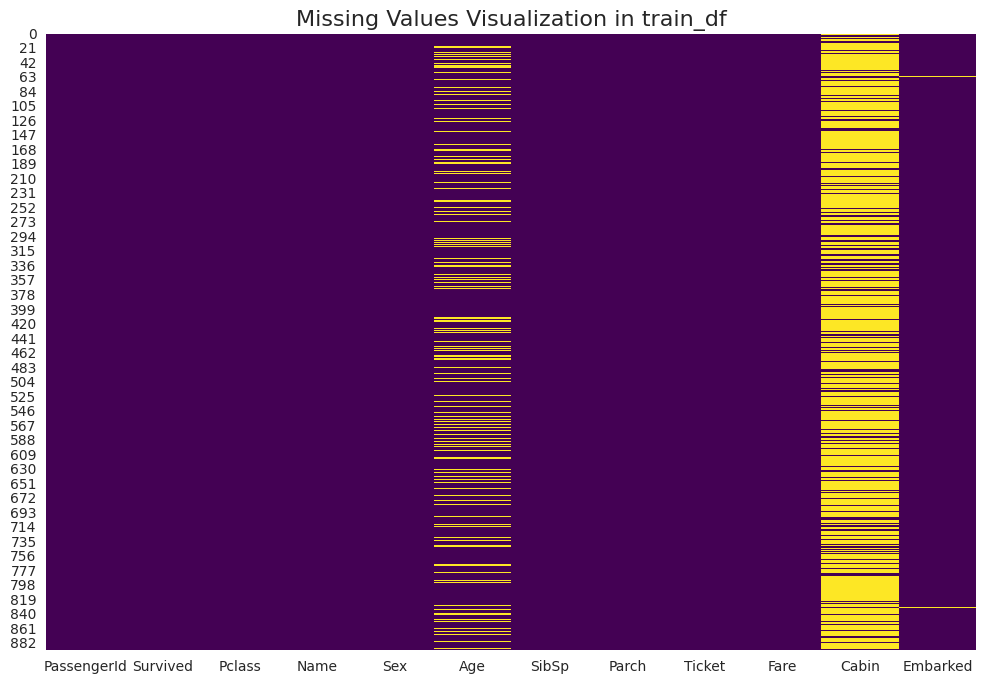

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization in train_df', fontsize=16)
plt.show()


In [10]:
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print(missing_test)

Cabin    327
Age       86
Fare       1
dtype: int64


In [11]:
missing_test_percentage = (test_df.isnull().sum() / len(test_df)) * 100
missing_test_percentage = missing_test_percentage[missing_test_percentage > 0].sort_values(ascending=False)
print(missing_test_percentage)

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64


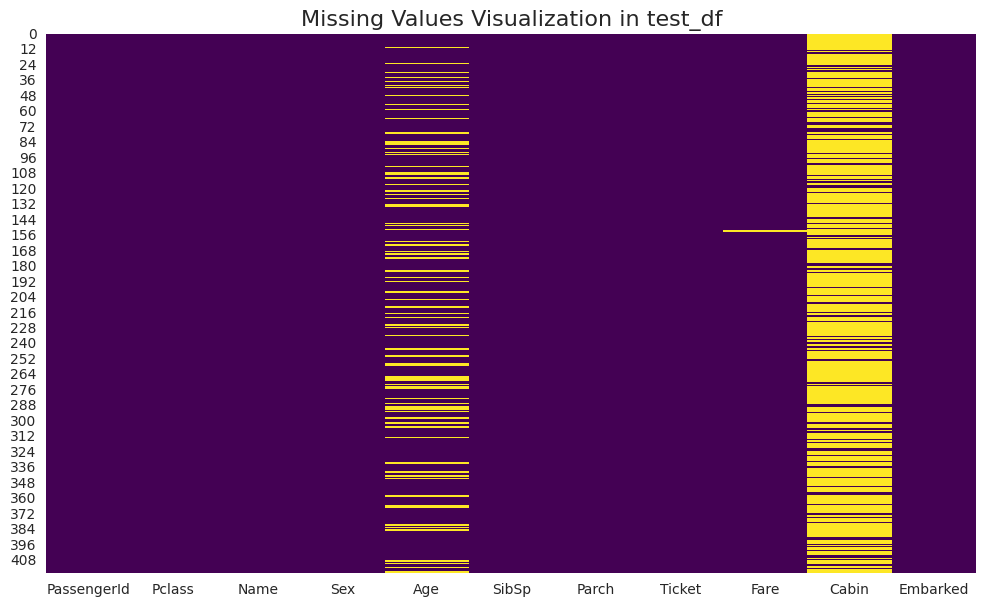

In [12]:
plt.figure(figsize=(12, 7))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization in test_df', fontsize=16)
plt.show()


--- Distribution of Categorical Features (train_df) ---


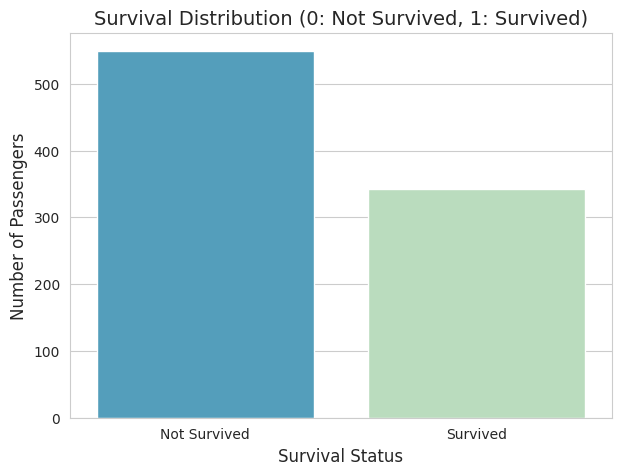


Survival Percentage:
          Percentage (%)
Survived                
0              61.616162
1              38.383838


In [13]:
print("\n--- Distribution of Categorical Features (train_df) ---")

plt.figure(figsize=(7, 5))
sns.countplot(x='Survived', data=train_df, palette='GnBu_r')
plt.title('Survival Distribution (0: Not Survived, 1: Survived)', fontsize=14)
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

print("\nSurvival Percentage:")
print(train_df['Survived'].value_counts(normalize=True).mul(100).rename('Percentage (%)').to_frame())

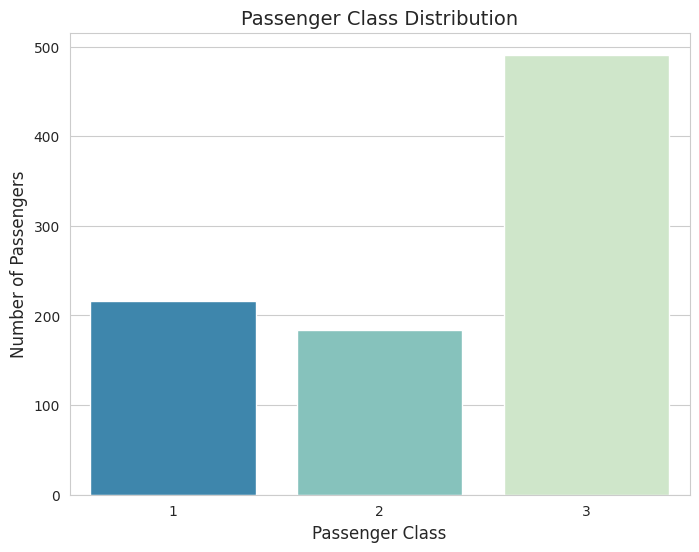


Passenger Class Percentage:
        Percentage (%)
Pclass                
3            55.106622
1            24.242424
2            20.650954


In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=train_df, palette='GnBu_r')
plt.title('Passenger Class Distribution', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()

print("\nPassenger Class Percentage:")
print(train_df['Pclass'].value_counts(normalize=True).mul(100).rename('Percentage (%)').to_frame())

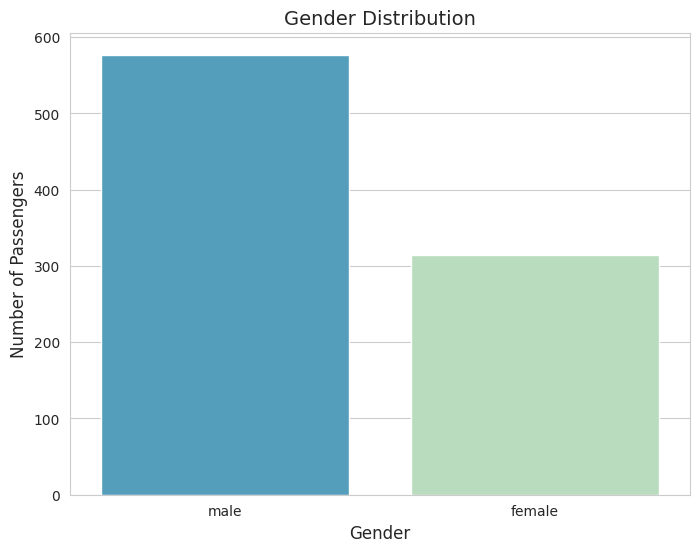


Gender Percentage:
        Percentage (%)
Sex                   
male         64.758698
female       35.241302


In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=train_df, palette='GnBu_r')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()

print("\nGender Percentage:")
print(train_df['Sex'].value_counts(normalize=True).mul(100).rename('Percentage (%)').to_frame())

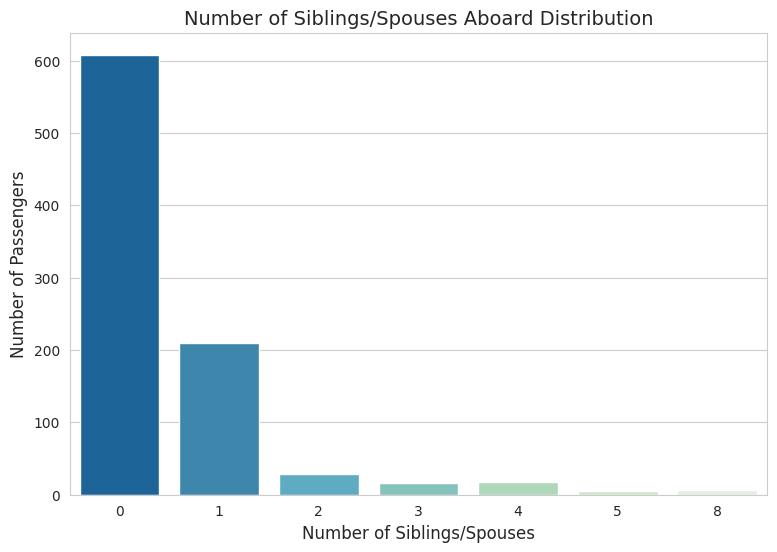


Siblings/Spouses Aboard Percentage:
       Percentage (%)
SibSp                
0           68.237935
1           23.456790
2            3.142536
4            2.020202
3            1.795735
8            0.785634
5            0.561167


In [16]:
plt.figure(figsize=(9, 6))
sns.countplot(x='SibSp', data=train_df, palette='GnBu_r')
plt.title('Number of Siblings/Spouses Aboard Distribution', fontsize=14)
plt.xlabel('Number of Siblings/Spouses', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()

print("\nSiblings/Spouses Aboard Percentage:")
print(train_df['SibSp'].value_counts(normalize=True).mul(100).rename('Percentage (%)').to_frame())

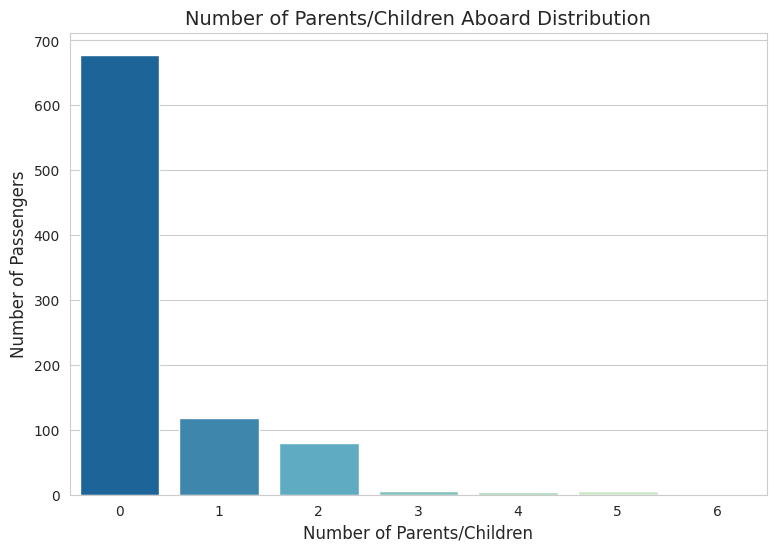


Parents/Children Aboard Percentage:
       Percentage (%)
Parch                
0           76.094276
1           13.243547
2            8.978676
5            0.561167
3            0.561167
4            0.448934
6            0.112233


In [17]:
plt.figure(figsize=(9, 6))
sns.countplot(x='Parch', data=train_df, palette='GnBu_r')
plt.title('Number of Parents/Children Aboard Distribution', fontsize=14)
plt.xlabel('Number of Parents/Children', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()

print("\nParents/Children Aboard Percentage:")
print(train_df['Parch'].value_counts(normalize=True).mul(100).rename('Percentage (%)').to_frame())

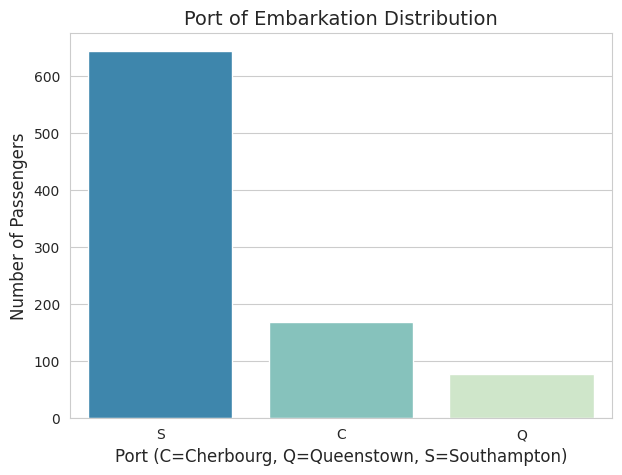


Port of Embarkation Percentage:
          Percentage (%)
Embarked                
S              72.440945
C              18.897638
Q               8.661417


In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Embarked', data=train_df, palette='GnBu_r')
plt.title('Port of Embarkation Distribution', fontsize=14)
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()

print("\nPort of Embarkation Percentage:")
print(train_df['Embarked'].value_counts(normalize=True).mul(100).rename('Percentage (%)').to_frame())



--- Distribution of Numerical Features (train_df) ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


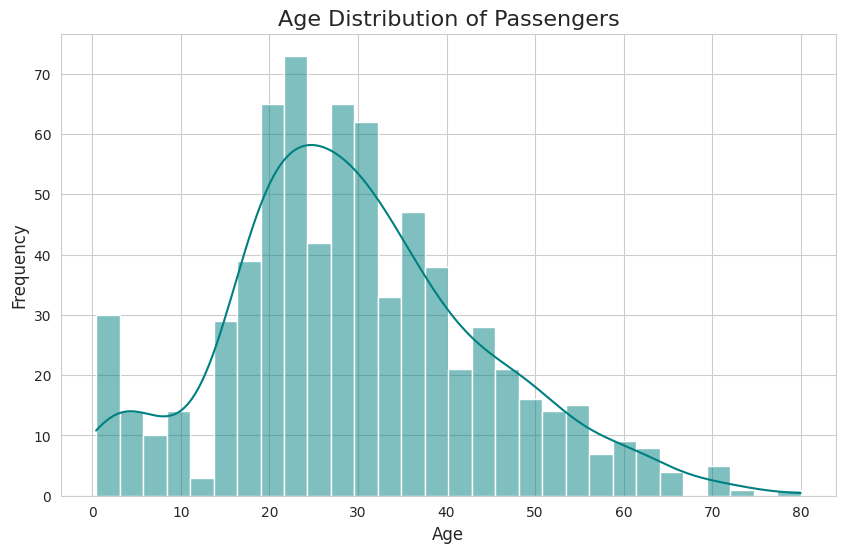

In [19]:
print("\n--- Distribution of Numerical Features (train_df) ---")

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30, color='teal')
plt.title('Age Distribution of Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

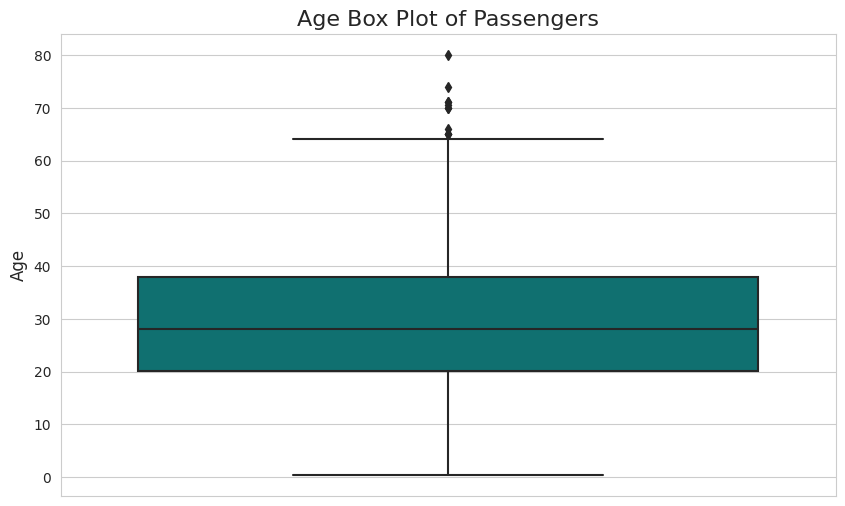

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Age', data=train_df, color='teal')
plt.title('Age Box Plot of Passengers', fontsize=16)
plt.ylabel('Age', fontsize=12)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


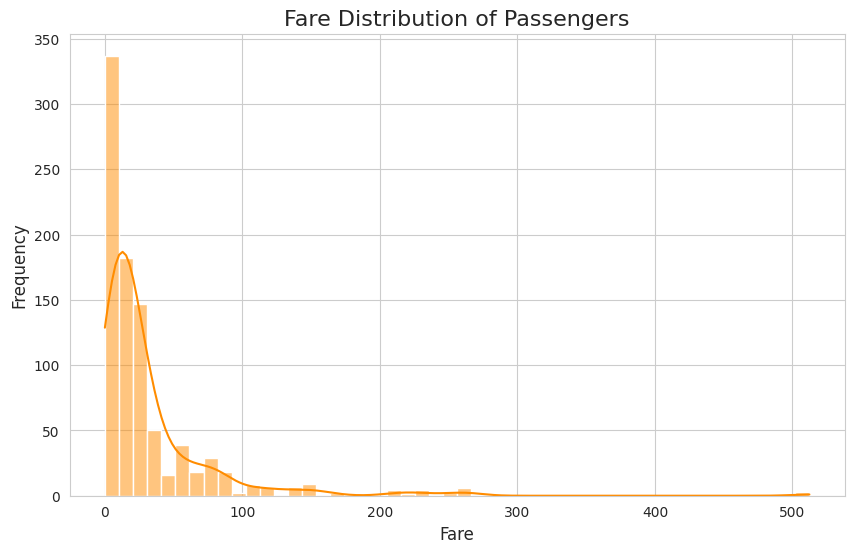

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'].dropna(), kde=True, bins=50, color='darkorange')
plt.title('Fare Distribution of Passengers', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

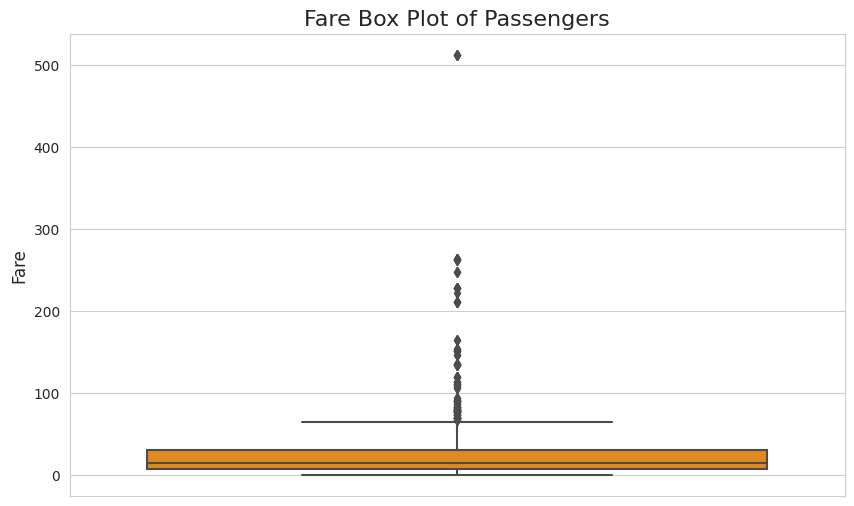

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fare', data=train_df, color='darkorange')
plt.title('Fare Box Plot of Passengers', fontsize=16)
plt.ylabel('Fare', fontsize=12)
plt.show()


--- Relationship Between Categorical Features and Survival ---


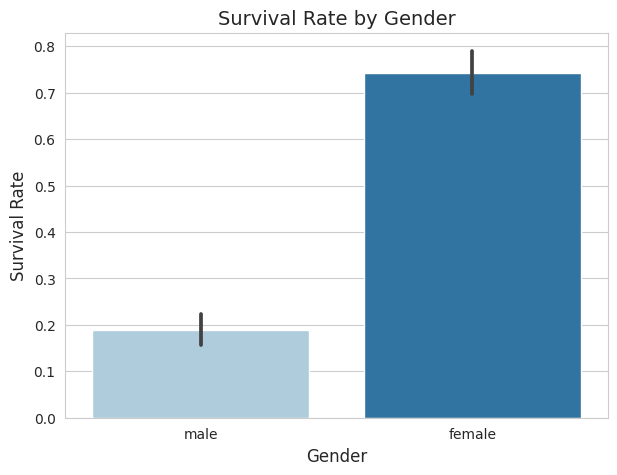


Survival Rate by Gender:
        Survival Rate (%)
Sex                      
female          74.203822
male            18.890815


In [23]:
print("\n--- Relationship Between Categorical Features and Survival ---")

plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=train_df, palette='Paired')
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

print("\nSurvival Rate by Gender:")
print(train_df.groupby('Sex')['Survived'].mean().mul(100).rename('Survival Rate (%)').to_frame())

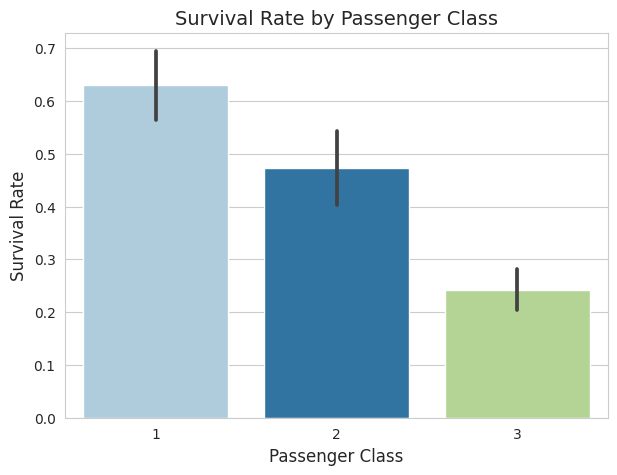


Survival Rate by Passenger Class:
        Survival Rate (%)
Pclass                   
1               62.962963
2               47.282609
3               24.236253


In [24]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Paired')
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

print("\nSurvival Rate by Passenger Class:")
print(train_df.groupby('Pclass')['Survived'].mean().mul(100).rename('Survival Rate (%)').to_frame())

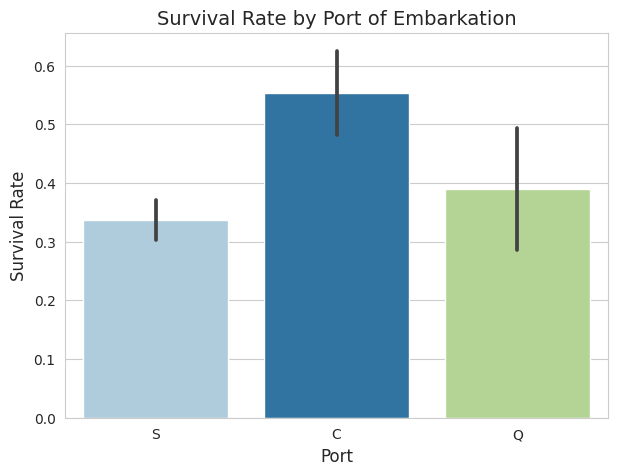


Survival Rate by Port of Embarkation:
          Survival Rate (%)
Embarked                   
C                 55.357143
Q                 38.961039
S                 33.695652


In [25]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=train_df, palette='Paired')
plt.title('Survival Rate by Port of Embarkation', fontsize=14)
plt.xlabel('Port', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

print("\nSurvival Rate by Port of Embarkation:")
print(train_df.groupby('Embarked')['Survived'].mean().mul(100).rename('Survival Rate (%)').to_frame())

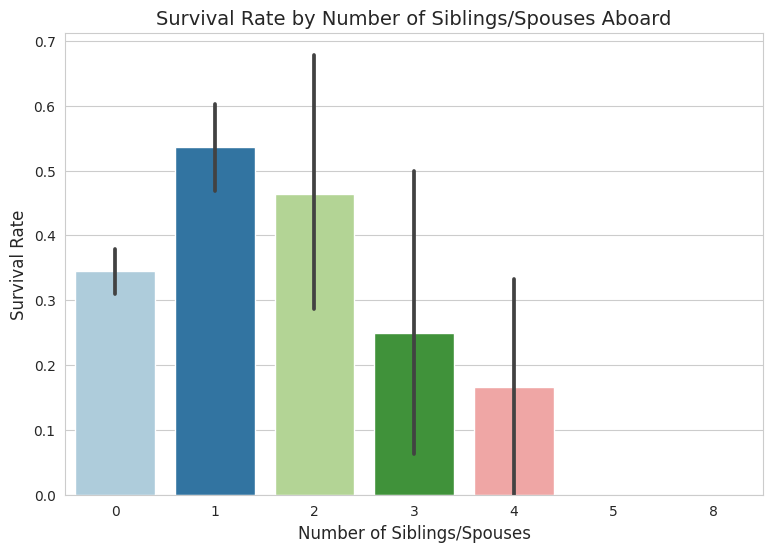


Survival Rate by Siblings/Spouses Aboard:
       Survival Rate (%)
SibSp                   
0              34.539474
1              53.588517
2              46.428571
3              25.000000
4              16.666667
5               0.000000
8               0.000000


In [26]:
plt.figure(figsize=(9, 6))
sns.barplot(x='SibSp', y='Survived', data=train_df, palette='Paired')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard', fontsize=14)
plt.xlabel('Number of Siblings/Spouses', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

print("\nSurvival Rate by Siblings/Spouses Aboard:")
print(train_df.groupby('SibSp')['Survived'].mean().mul(100).rename('Survival Rate (%)').to_frame())

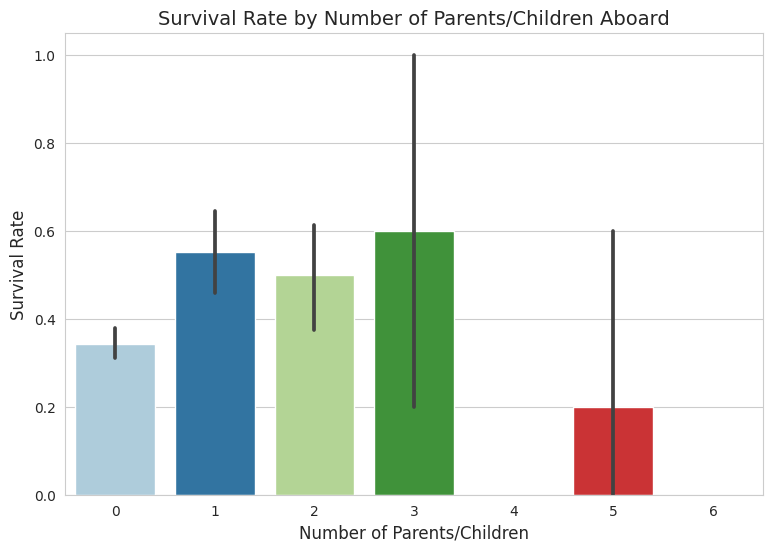


Survival Rate by Parents/Children Aboard:
       Survival Rate (%)
Parch                   
0              34.365782
1              55.084746
2              50.000000
3              60.000000
4               0.000000
5              20.000000
6               0.000000


In [27]:
plt.figure(figsize=(9, 6))
sns.barplot(x='Parch', y='Survived', data=train_df, palette='Paired')
plt.title('Survival Rate by Number of Parents/Children Aboard', fontsize=14)
plt.xlabel('Number of Parents/Children', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

print("\nSurvival Rate by Parents/Children Aboard:")
print(train_df.groupby('Parch')['Survived'].mean().mul(100).rename('Survival Rate (%)').to_frame())
